In [9]:
%matplotlib inline

import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
mnist = input_data.read_data_sets('data', one_hot=True)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


7


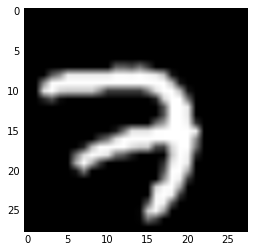

In [22]:
image0, label0 = mnist.train.images[0], mnist.train.labels[0]
image0 = image0.reshape((28, 28))
plt.imshow(image0, cmap='gray')
print(np.argmax(label0))

In [23]:
# model 1 hiden layer

x = tf.placeholder(tf.float32, shape=[None, 784])
y = tf.placeholder(tf.float32, shape=[None, 10])

W_h1 = tf.Variable(tf.truncated_normal([784, 512]))
#b1 = tf.Variable(tf.random_normal([512]))
h1 = tf.nn.sigmoid(tf.matmul(x, W_h1))

# W_h2 = tf.Variable(tf.random_normal([256, 10]))
# h2 = tf.sigmoid(tf.matmul(h1, W_h2))

W_out = tf.Variable(tf.truncated_normal([512, 10]))
#b_out = tf.Variable(tf.random_normal([10]))
y_ = tf.nn.sigmoid(tf.matmul(h1, W_out))

#cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(y_, y)
cross_entropy = tf.reduce_sum(- y * tf.log(tf.clip_by_value(y_, 1e-10, 1.0))\
                              - (1 - y) * tf.log(tf.clip_by_value(1 - y_, 1e-10, 1.0)), 1)
loss = tf.reduce_mean(cross_entropy)
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [25]:
# train

session = tf.Session()
session.run(tf.initialize_all_variables())

for i in range(5000):
    batch_x, batch_y = mnist.train.next_batch(100)
    _, l = session.run([train_step, loss], feed_dict={x: batch_x, y: batch_y})

    if i % 100 == 0:
        train_accuracy = accuracy.eval(session=session, feed_dict={x: batch_x, y: batch_y})
        print('step {0}, training accuracy {1:.2f}, loss {2}'.format(i, train_accuracy * 100, l))

step 0, training accuracy 5.00, loss 56.425567626953125
step 100, training accuracy 40.00, loss 6.190169811248779
step 200, training accuracy 64.00, loss 3.3621304035186768
step 300, training accuracy 62.00, loss 3.8709826469421387
step 400, training accuracy 61.00, loss 3.605178117752075
step 500, training accuracy 77.00, loss 2.4009287357330322
step 600, training accuracy 82.00, loss 1.8525471687316895
step 700, training accuracy 88.00, loss 1.482973337173462
step 800, training accuracy 79.00, loss 1.9590041637420654
step 900, training accuracy 82.00, loss 2.202303886413574
step 1000, training accuracy 82.00, loss 1.5566208362579346
step 1100, training accuracy 84.00, loss 1.725814938545227
step 1200, training accuracy 88.00, loss 1.2392195463180542
step 1300, training accuracy 83.00, loss 1.8041082620620728
step 1400, training accuracy 83.00, loss 1.7646795511245728
step 1500, training accuracy 91.00, loss 1.1890240907669067
step 1600, training accuracy 89.00, loss 0.945571601390838

# Accuracy

In [49]:
acc = session.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})
print(acc)

0.9079


In [26]:
W_h1_out = W_h1.eval(session=session)

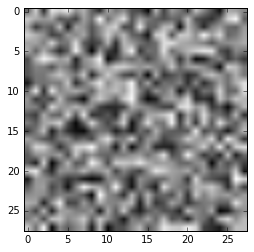

In [41]:
image0 = W_h1_out.transpose()[100].reshape((28, 28))
plt.imshow(image0, cmap='gray')